In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset
file_path = 'Real World Smartphone\'s Dataset export 2025-01-10 17-51-49.csv'
data = pd.read_csv(file_path)
data.fillna(0, inplace=True)

# Display first few rows and info
print(data.head(2))
print(data.info())


  brand_name                    model  price  avg_rating  5G_or_not  \
0      apple          Apple iPhone 11  38999         7.3          0   
1      apple  Apple iPhone 11 (128GB)  46999         7.5          0   

  processor_brand  num_cores  processor_speed  battery_capacity  \
0          bionic          6             2.65              3110   
1          bionic          6             2.65              3110   

   fast_charging_available  ...  internal_memory  screen_size  refresh_rate  \
0                        0  ...               64          6.1            60   
1                        0  ...              128          6.1            60   

   num_rear_cameras   os  primary_camera_rear primary_camera_front  \
0                 2  ios                   12                   12   
1                 2  ios                   12                   12   

   extended_memory_available  resolution_height  resolution_width  
0                          0               1792               828  

In [2]:
# Convert categorical values to lowercase for consistency
data['brand_name'] = data['brand_name'].str.lower()
data['processor_brand'] = data['processor_brand'].str.lower()

# Brand Value Mapping
brand_value_map = {
    'apple': 1.0, 'samsung': 0.9, 'google': 0.85, 'huawei': 0.8, 
    'xiaomi': 0.75, 'vivo': 0.7, 'asus': 0.8, 'iqoo': 0.75, 'others': 0.6
}
data['brand_value'] = data['brand_name'].map(brand_value_map).fillna(0.6)

# Processor Brand Score
processor_tiers = {
    'bionic': 1.0, 'snapdragon': 0.9, 'tensor': 0.85, 'exynos': 0.8,
    'dimensity': 0.75, 'helio': 0.65, 'kirin': 0.7
}
data['processor_brand_score'] = data['processor_brand'].map(processor_tiers).fillna(0.6)

# Performance Score Calculation
data['performance_score'] = (
    (data['processor_speed'] * 0.35) + (data['num_cores'] * 0.25) +
    (data['ram_capacity'] * 0.2) + (data['internal_memory'] * 0.1) +
    (data['processor_brand_score'] * 0.1)
)

# Gaming Score
data['gaming_score'] = (
    (data['refresh_rate'] * 0.3) + (data['processor_speed'] * 0.3) +
    (data['ram_capacity'] * 0.2) + (data['battery_capacity'] * 0.1) +
    (data['brand_value'] * 0.1)
)

# Camera Quality Score
data['camera_quality_score'] = (
    (data['primary_camera_rear'] * 0.45) + (data['primary_camera_front'] * 0.25) +
    (data['num_rear_cameras'] * 0.15) + (data['brand_value'] * 0.15)
)

# Entertainment Score
data['entertainment_score'] = (
    (data['screen_size'] * 0.35) + (data['resolution_height'] * 0.3) +
    (data['battery_capacity'] * 0.2) + (data['refresh_rate'] * 0.1) +
    (data['brand_value'] * 0.05)
)

# Network Score
data['network_score'] = data['5G_or_not'] * 1.0  

# OS Score
data['os_score'] = data['os'].map({0: 0.5, 1: 1.0, 2: 0.3}).fillna(0.5)
data['os_score'] += (data['brand_value'] * 0.1)
data['os_score'] = data['os_score'].clip(0, 1)

# Display Quality Score Calculation using PPI
data['ppi'] = np.sqrt(data['resolution_width']**2 + data['resolution_height']**2) / data['screen_size']
data['display_quality_score'] = (
    (data['ppi'] * 0.45) +  
    (data['refresh_rate'] * 0.3) +  
    (data['screen_size'] * 0.2) +   
    (data['brand_value'] * 0.05)    
)


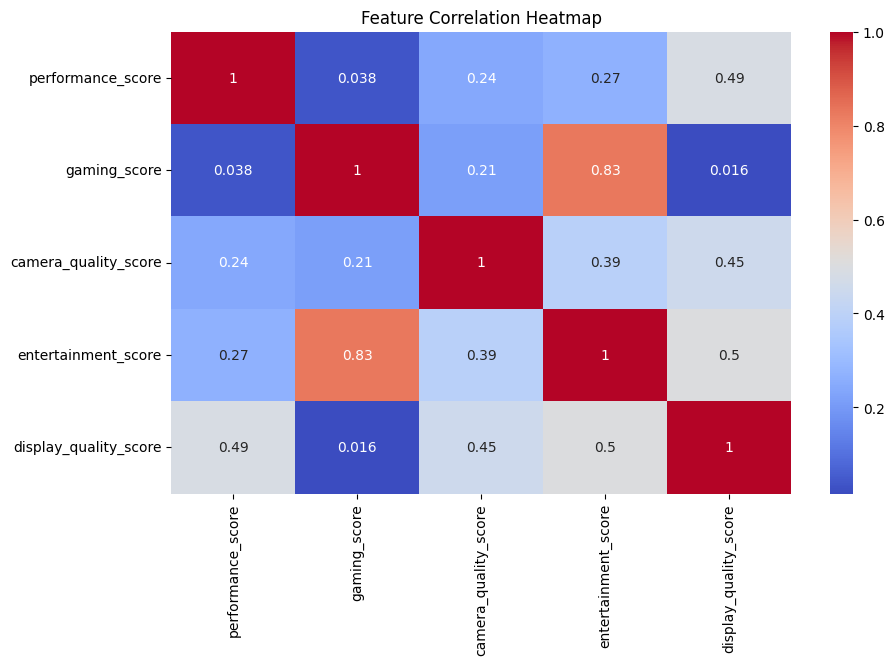

In [3]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data[['performance_score', 'gaming_score', 'camera_quality_score', 'entertainment_score', 'display_quality_score']].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Features to scale
features_to_scale = ['performance_score', 'gaming_score', 'camera_quality_score', 
                     'entertainment_score', 'display_quality_score', 
                     'brand_value', 'network_score', 'os_score']

# Normalize the features
scaler = MinMaxScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import numpy as np

# Prepare dataset
X = data[features_to_scale].values  
y = np.random.rand(len(data), len(features_to_scale)) 

# Define Neural Network
model = Sequential([
    Dense(128, input_dim=X.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    
    Dense(len(features_to_scale), activation='linear') 
])

# Compile and Train
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(X, y, epochs=150, batch_size=32, verbose=1)

# Predict dynamic weights
predicted_weights = model.predict(X).mean(axis=0)


c:\Users\debam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3494
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5901 
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3971 
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3095 
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2660 
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2257 
Epoch 7/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1982 
Epoch 8/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1743 
Epoch 9/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1701 
Epoch 10/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1576 
Epoch 11/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1498 
Epoch 12/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1448 
Epoch 13/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1363
Epoch 14/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1264 
Epoch 15/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

In [6]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances

def apply_marcost_with_distances(data, features_to_scale, predicted_weights):
    # Step 1: Multiply each feature score by its dynamic weight
    weighted_data = data.copy()
    for i, feature in enumerate(features_to_scale):
        weighted_data[feature] *= predicted_weights[i]  # Adjust scores using learned feature importance
    
    # Step 2: Compute the Ideal Best and Ideal Worst solutions
    ideal_best = weighted_data[features_to_scale].max().values  # Best alternative for each feature
    ideal_worst = weighted_data[features_to_scale].min().values  # Worst alternative for each feature
    
    # Step 3: Calculate distances to Ideal Best and Ideal Worst
    # Euclidean Distance
    weighted_data['euclidean_to_best'] = np.linalg.norm(weighted_data[features_to_scale] - ideal_best, axis=1)
    weighted_data['euclidean_to_worst'] = np.linalg.norm(weighted_data[features_to_scale] - ideal_worst, axis=1)
    
    # Manhattan Distance
    weighted_data['manhattan_to_best'] = np.abs(weighted_data[features_to_scale] - ideal_best).sum(axis=1)
    weighted_data['manhattan_to_worst'] = np.abs(weighted_data[features_to_scale] - ideal_worst).sum(axis=1)
    
    # Cosine Distance
    cosine_best = cosine_distances(weighted_data[features_to_scale], ideal_best.reshape(1, -1)).flatten()
    cosine_worst = cosine_distances(weighted_data[features_to_scale], ideal_worst.reshape(1, -1)).flatten()
    weighted_data['cosine_to_best'] = cosine_best
    weighted_data['cosine_to_worst'] = cosine_worst
    
    # Step 4: Compute MARCOS Score for each distance metric
    weighted_data['m_arcos_euclidean'] = weighted_data['euclidean_to_worst'] / (weighted_data['euclidean_to_best'] + weighted_data['euclidean_to_worst'])
    weighted_data['m_arcos_manhattan'] = weighted_data['manhattan_to_worst'] / (weighted_data['manhattan_to_best'] + weighted_data['manhattan_to_worst'])
    weighted_data['m_arcos_cosine'] = weighted_data['cosine_to_worst'] / (weighted_data['cosine_to_best'] + weighted_data['cosine_to_worst'])
    
    # Step 5: Rank smartphones based on MARCOS score
    weighted_data['rank_euclidean'] = weighted_data['m_arcos_euclidean'].rank(ascending=False)
    weighted_data['rank_manhattan'] = weighted_data['m_arcos_manhattan'].rank(ascending=False)
    weighted_data['rank_cosine'] = weighted_data['m_arcos_cosine'].rank(ascending=False)

    # Select only relevant columns for ranking display
    ranked_data = weighted_data[['model', 'rank_euclidean', 'rank_manhattan', 'rank_cosine']]
    
    return ranked_data

# Run the function on your actual dataset
ranked_results = apply_marcost_with_distances(data, features_to_scale, predicted_weights)

# Display Rankings
print(ranked_results)


                                         model  rank_euclidean  \
0                              Apple iPhone 11           237.0   
1                      Apple iPhone 11 (128GB)           221.0   
2                      Apple iPhone 11 Pro Max           169.0   
3                              Apple iPhone 12            60.0   
4                      Apple iPhone 12 (128GB)            55.0   
..                                         ...             ...   
970                    Xiaomi Redmi Note 9 Pro           670.5   
971  Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB)           664.5   
972                Xiaomi Redmi Note 9 Pro Max           653.0   
973                               ZTE Axon 30S           575.0   
974                       ZTE Axon 40 Ultra 5G           444.0   

     rank_manhattan  rank_cosine  
0             349.0        938.0  
1             335.0        935.0  
2             236.0        778.0  
3              63.0        477.0  
4              55.0        452.0

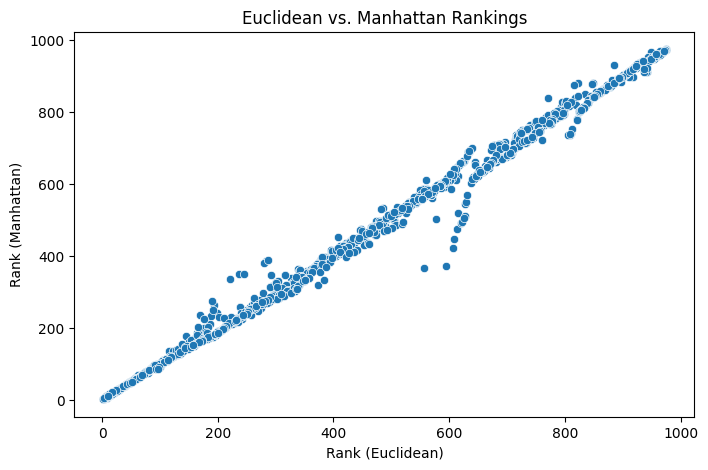

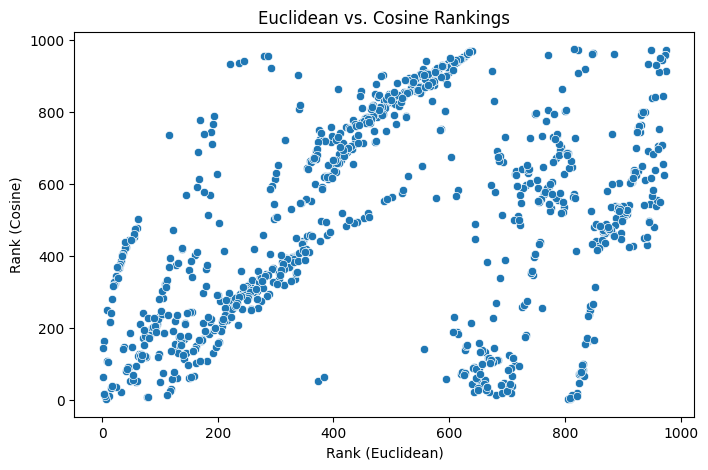

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Euclidean vs Manhattan
plt.figure(figsize=(8,5))
sns.scatterplot(x=ranked_results["rank_euclidean"], y=ranked_results["rank_manhattan"])
plt.xlabel("Rank (Euclidean)")
plt.ylabel("Rank (Manhattan)")
plt.title("Euclidean vs. Manhattan Rankings")
plt.show()

# Scatter plot: Euclidean vs Cosine
plt.figure(figsize=(8,5))
sns.scatterplot(x=ranked_results["rank_euclidean"], y=ranked_results["rank_cosine"])
plt.xlabel("Rank (Euclidean)")
plt.ylabel("Rank (Cosine)")
plt.title("Euclidean vs. Cosine Rankings")
plt.show()


In [8]:
import numpy as np
import pandas as pd
static_weights = np.ones(len(features_to_scale))
def traditional_marcost_ranking(data, features_to_scale, static_weights):
    """Compute traditional MARCOS ranking using fixed weights"""
    data_trad = data.copy()
    
    # Step 1: Multiply each feature score by static weight
    for i, feature in enumerate(features_to_scale):
        data_trad[feature] *= static_weights[i]  
    
    # Step 2: Compute Ideal Best and Ideal Worst
    ideal_best = data_trad[features_to_scale].max().values  
    ideal_worst = data_trad[features_to_scale].min().values  
    
    # Step 3: Calculate Euclidean distances
    data_trad['distance_to_best'] = np.linalg.norm(data_trad[features_to_scale] - ideal_best, axis=1)
    data_trad['distance_to_worst'] = np.linalg.norm(data_trad[features_to_scale] - ideal_worst, axis=1)
    
    # Step 4: Compute MARCOS Score
    data_trad['m_arcos_score_trad'] = data_trad['distance_to_worst'] / (data_trad['distance_to_best'] + data_trad['distance_to_worst'])
    
    # Step 5: Rank smartphones
    data_trad = data_trad.sort_values(by='m_arcos_score_trad', ascending=False).reset_index(drop=True)
    data_trad['rank_traditional'] = data_trad.index + 1  # Assign rank (1 is best)
    
    return data_trad[['model', 'rank_traditional']]

def deep_learning_marcost_ranking(data, features_to_scale, deep_learning_model):
    """Compute deep learning-based MARCOS ranking using predicted dynamic weights"""
    data_dl = data.copy()
    
    # Step 1: Predict dynamic weights using deep learning model
    predicted_weights = deep_learning_model.predict(data[features_to_scale])  # Model predicts weights
    
    # Step 2: Multiply each feature score by its predicted weight
    for i, feature in enumerate(features_to_scale):
        data_dl[feature] *= predicted_weights[:, i]  
    
    # Step 3: Compute Ideal Best and Ideal Worst
    ideal_best = data_dl[features_to_scale].max().values  
    ideal_worst = data_dl[features_to_scale].min().values  
    
    # Step 4: Calculate Euclidean distances
    data_dl['distance_to_best'] = np.linalg.norm(data_dl[features_to_scale] - ideal_best, axis=1)
    data_dl['distance_to_worst'] = np.linalg.norm(data_dl[features_to_scale] - ideal_worst, axis=1)
    
    # Step 5: Compute MARCOS Score
    data_dl['m_arcos_score_dl'] = data_dl['distance_to_worst'] / (data_dl['distance_to_best'] + data_dl['distance_to_worst'])
    
    # Step 6: Rank smartphones
    data_dl = data_dl.sort_values(by='m_arcos_score_dl', ascending=False).reset_index(drop=True)
    data_dl['rank_deep_learning'] = data_dl.index + 1  # Assign rank (1 is best)
    
    return data_dl[['model', 'rank_deep_learning']]

# ---- APPLYING BOTH METHODS ----
traditional_ranks = traditional_marcost_ranking(data, features_to_scale, static_weights)
deep_learning_ranks = deep_learning_marcost_ranking(data, features_to_scale, model)

# Merge results to compare rankings
comparison = traditional_ranks.merge(deep_learning_ranks, on='model')
comparison['rank_difference'] = comparison['rank_traditional'] - comparison['rank_deep_learning']

# Display Comparison
print(comparison.sort_values(by='rank_traditional'))


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step
                               model  rank_traditional  rank_deep_learning  \
0      Apple iPhone 14 Pro Max (1TB)                 1                   1   
1          Apple iPhone 14 Pro (1TB)                 2                   3   
2      Apple iPhone 13 Pro Max (1TB)                 3                   2   
3           Samsung Galaxy S24 Ultra                 4                  15   
4    Samsung Galaxy Note 30 Ultra 5G                 5                   9   
..                               ...               ...                 ...   
970                        TCL Ion X               971                 971   
971                     Itel A24 Pro               972                 972   
972                        itel A23s               973                 973   
973                     Itel A23 Pro               974                 974   
974                     CAT S22 Flip               975                 975   

     rank_difference  

In [9]:
print("Traditional Static Weights:", static_weights)
print("Deep Learning Predicted Weights (First Sample):", model.predict(data[features_to_scale])[0])


Traditional Static Weights: [1. 1. 1. 1. 1. 1. 1. 1.]
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step
Deep Learning Predicted Weights (First Sample): [0.48438853 0.5117074  0.49227977 0.49927047 0.46994543 0.46402347
 0.45948857 0.45743144]


#stay 

In [10]:
# Step 1: Multiply each feature score by its dynamic weight
for i, feature in enumerate(features_to_scale):
    data[feature] *= predicted_weights[i]  # Adjust scores using the learned feature importance

# Step 2: Compute the Ideal Best and Ideal Worst solutions
ideal_best = data[features_to_scale].max().values  # Best alternative for each feature
ideal_worst = data[features_to_scale].min().values  # Worst alternative for each feature

# Step 3: Calculate Euclidean distances to Ideal Best and Ideal Worst
data['distance_to_best'] = np.linalg.norm(data[features_to_scale] - ideal_best, axis=1)  # Distance to Best
data['distance_to_worst'] = np.linalg.norm(data[features_to_scale] - ideal_worst, axis=1)  # Distance to Worst

# Step 4: Compute MARCOS Score
data['m_arcos_score'] = data['distance_to_worst'] / (data['distance_to_best'] + data['distance_to_worst'])

# Step 5: Rank smartphones based on MARCOS score
data = data.sort_values(by='m_arcos_score', ascending=False)  # Higher score means better ranking


In [11]:
print(data[['model', 'm_arcos_score'] + features_to_scale])


                             model  m_arcos_score  performance_score  \
31   Apple iPhone 14 Pro Max (1TB)       0.594551           0.493375   
28       Apple iPhone 14 Pro (1TB)       0.581870           0.493375   
19   Apple iPhone 13 Pro Max (1TB)       0.579633           0.492976   
675       Samsung Galaxy S24 Ultra       0.569976           0.130824   
674    Samsung Galaxy S23 Ultra 5G       0.568023           0.132344   
..                             ...            ...                ...   
692                      TCL Ion X       0.068998           0.019073   
167                   Itel A24 Pro       0.025896           0.012351   
166                      itel A23s       0.025896           0.012351   
165                   Itel A23 Pro       0.012048           0.000000   
53                    CAT S22 Flip       0.007956           0.004727   

     gaming_score  camera_quality_score  entertainment_score  \
31       0.067868              0.110772             0.126359   
28     

In [12]:
import tkinter as tk
from tkinter import ttk, messagebox
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load the LLM model and tokenizer
model_name = "gpt2"  # Replace with your model choice
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Create main window (root)
root = tk.Tk()
root.title("Mobile Phone Ranking System")
root.geometry("600x600")  # Set default window size
root.configure(bg="#e3f2fd")  # Light blue background

def update_ranking():
    # Get user preferences from input fields
    gaming_preference = gaming_slider.get()
    photography_preference = photography_slider.get()
    budget_preference = budget_slider.get()

    # Filter data based on preferences and compute the MARCOS score
    filtered_data = data.copy()  # You can apply preferences to adjust data here
    filtered_data['adjusted_MARCOS'] = filtered_data['m_arcos_score'] * (gaming_preference * 0.5 + photography_preference * 0.5)
    
    # Filter data based on budget range (10% range above and below the budget)
    budget_lower = budget_preference * 0.9
    budget_upper = budget_preference * 1.1
    filtered_data = filtered_data[(filtered_data['price'] >= budget_lower) & (filtered_data['price'] <= budget_upper)]
    
    # Rank the phones based on adjusted MARCOS score
    ranked_phones = filtered_data.sort_values(by='adjusted_MARCOS', ascending=False)
    
    # Update the display table
    update_phone_table(ranked_phones)

def update_phone_table(ranked_phones):
    for row in tree.get_children():
        tree.delete(row)
    
    for index, row in ranked_phones.iterrows():
        tree.insert('', 'end', values=(row['model'], round(row['adjusted_MARCOS'], 2), row['price']))

def show_explanation():
    # Generate explanation based on the user input and preferences
    explanation = generate_explanation(gaming_slider.get(), photography_slider.get(), budget_slider.get())
    explanation_text.delete(1.0, tk.END)
    explanation_text.insert(tk.END, explanation)

def generate_explanation(gaming_preference, photography_preference, budget_preference):
    # Adjust the input to emphasize the Indian market context
    indian_market_input = f"""
    Explain why these phones are ranked based on the following preferences in the Indian market:
    - Gaming Preference: {gaming_preference}
    - Photography Preference: {photography_preference}
    - Budget: {budget_preference} INR

    The phones have the following characteristics:
    - Price in INR
    - Gaming performance (higher performance means better ranking for gaming enthusiasts)
    - Photography features (better cameras result in higher ranking for photography enthusiasts)
    - Value for money (phones offering better features within the budget tend to rank higher)
    """

    # Tokenize the input text
    input_ids = tokenizer.encode(indian_market_input, return_tensors="pt")
    
    # Generate the explanation using the LLM
    outputs = model.generate(input_ids, max_length=150, num_return_sequences=1, no_repeat_ngram_size=2)
    
    # Decode and return the explanation
    explanation = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return explanation

# Function to stop the application with confirmation
def stop_application():
    response = messagebox.askyesno("Exit Confirmation", "Are you sure you want to exit?")
    if response:  # If user clicks "Yes"
        root.quit()  # Close the application

# ==== UI Components ====

# Labels and Sliders for User Preferences
gaming_label = tk.Label(root, text="Gaming Preference (0-10):", font=("Arial", 11), bg="#e3f2fd")
gaming_label.pack(pady=5)

gaming_slider = tk.Scale(root, from_=0, to=10, orient="horizontal", bg="#bbdefb", length=300)
gaming_slider.pack()

photography_label = tk.Label(root, text="Photography Preference (0-10):", font=("Arial", 11), bg="#e3f2fd")
photography_label.pack(pady=5)

photography_slider = tk.Scale(root, from_=0, to=10, orient="horizontal", bg="#bbdefb", length=300)
photography_slider.pack()

budget_label = tk.Label(root, text="Budget (INR):", font=("Arial", 11), bg="#e3f2fd")
budget_label.pack(pady=5)

budget_slider = tk.Scale(root, from_=0, to=150000, orient="horizontal", bg="#bbdefb", length=300)
budget_slider.pack()

# Buttons with better styling
button_frame = tk.Frame(root, bg="#e3f2fd")
button_frame.pack(pady=10)

rank_button = tk.Button(button_frame, text="Rank Phones", command=update_ranking, bg="#4CAF50", fg="white", font=("Arial", 11), padx=10, pady=5)
rank_button.grid(row=0, column=0, padx=5)

explanation_button = tk.Button(button_frame, text="Show Explanation", command=show_explanation, bg="#ff9800", fg="white", font=("Arial", 11), padx=10, pady=5)
explanation_button.grid(row=0, column=1, padx=5)

stop_button = tk.Button(button_frame, text="Stop", command=stop_application, bg="#d9534f", fg="white", font=("Arial", 11), padx=10, pady=5)
stop_button.grid(row=0, column=2, padx=5)

# Treeview Table for Ranked Phones
tree_frame = tk.Frame(root)
tree_frame.pack(pady=10)

tree = ttk.Treeview(tree_frame, columns=('Model', 'MARCOS Score', 'Price'), show='headings', height=8)
tree.column('Model', width=250)
tree.column('MARCOS Score', width=100, anchor="center")
tree.column('Price', width=100, anchor="center")

tree.heading('Model', text='Model')
tree.heading('MARCOS Score', text='MARCOS Score')
tree.heading('Price', text='Price (INR)')

tree.pack()

# Text Box for Explanation
explanation_text = tk.Text(root, height=5, width=60, font=("Arial", 11))
explanation_text.pack(pady=10)

# Run the GUI
root.mainloop()
